In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# PhysiSim: A Basic Physics Engine Implementation for Computer Games and Simulations
##### Exploring Vectors, Newtonian Mechanics, Collision Detection, and Visualization for Realistic Object Motion and Interaction

## 1. Building a Strong Foundation: Understanding Vectors and Algebra in Physics Engines
### 1.1 Vectors
Games, especially game graphics, are made up of a lot of mathematics. The mathematics used in game graphics, physics, and so forth can become quite complex and advanced. Having a firm understanding of the different types of mathematics that are used in game development can allow you to have an easier time understanding and implementing the information.
    
Vectors simplify many of the common tasks you’ll need to do while writing a physics engine. Not only does linear algebra eliminate having to solve separate dimensions separately, it also helps you abstract away from “2D vs 3D” (because you’re not using variables like “positionX” and “positionY” and “positionZ” separately). Using vectors also helps you do intuitive things like adding and subtracting vectors–and keep in mind that you can model points as vectors, so any math you can do to vectors you can do to points as well, including rotation around any other point.
    
    Implementing a Vector class that represents a 2D vector and provides methods for vector addition, subtraction, scalar multiplication, dot product, and magnitude calculation: 
```python
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)
    
    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)
    
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)
    
    def dot(self, other):
        return self.x * other.x + self.y * other.y
    
    def magnitude(self):
        return math.sqrt(self.x**2 + self.y**2)
```
In short: get comfortable with vectors. The first thing you should do is write a simple vector class that does vector addition, subtraction, multiplication, dot product, cross product, and rotation. That’s all you need. The rest of your physics engine will be built atop vectors.


In [3]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

    def dot(self, other):
        return self.x * other.x + self.y * other.y

    def cross(self, other):
        return self.x * other.y - self.y * other.x

    def magnitude(self):
        return math.sqrt(self.x**2 + self.y**2)

    def normalize(self):
        magnitude = self.magnitude()
        return Vector(self.x / magnitude, self.y / magnitude)

### 1.2 Newton’s 2nd Law of Motion
Newton’s 2nd Law of motion, which you may remember from high school, relates an object’s acceleration to the amount of force applied to that object. The formula itself is:
$$ F = ma $$

The “F” and “a” here represent vectors. This means that, if you wanted to, you could split this equation up into three parts and use each separately:
$$ F_x = ma_x $$
$$ F_y = ma_y $$
$$ F_z = ma_z $$

The process for simulating an object’s motion goes something like this:

1. Figure out what the forces are on an object
2. Add those forces up to get a single “resultant” or “net” force
3. Use $ F = ma $ to calculate the object’s acceleration due to those forces
4. Use the object’s acceleration to calculate the object’s velocity
5. Use the object’s velocity to calculate the object’s position
6. Since the forces on the object may change from moment to moment, repeat this process from #1.

### 1.3 Calculating Velocity and Position
Acceleration, velocity, and position are closely related through calculus. Concretely speaking, velocity is the “rate of change over time” of position – in calculus, this is called the “time derivative” or simply the “derivative” for short.
    
    Velocity is just a measure of distance travelled in a measure of time. Similarly, acceleration is just a measure of velocity changed in a measure of time.
The relationship between position, velocity, and acceleration is very helpful to us, because if we know the history of an object’s position, we can figure out its velocity by asking “how much did this object move in the last second?” We can calculate acceleration similarly.

What we’re about to do is called numerical integration–in contrast with analytical integration which requires a pencil, paper, and a calculus textbook.

Every method of numerical integration for Newton’s laws involves some manner of maintaining a clock and doing calculations for tiny little snapshots in time. Game engines sometimes have the graphics engine running at 30 fps and the physics engine at 60 fps–in that case, the numerical integration is using a timestep of 1/60 seconds (16 milliseconds).

The simplest way to perform numerical integration is called Euler’s method. Here’s some pseudocode (assume that acceleration, velocity, and position all start at 0). In this example, force, acceleration, velocity, and position are all vectors–so this pseudocode handles 2D and 3D alike.

```python
acceleration = force / mass
velocity += acceleration * time_step
position += velocity * time_step
```

Euler’s method is great to build a conceptual understanding from, but it’s not terribly accurate. In many situations, this technique becomes unstable and can yield some unpleasant results. So we’ll go a step further and use what’s called [Velocity Verlet](https://en.wikipedia.org/wiki/Verlet_integration#Velocity_Verlet) integration. Instead of the above, we can do the following:

In [4]:
def update_motion(e_acceleration, e_position, e_velocity, e_force, e_mass, e_time_step):
    last_acceleration = e_acceleration
    
    e_position += e_velocity * e_time_step + (0.5 * last_acceleration * e_time_step ** 2)
    
    new_acceleration = e_force / e_mass
    avg_acceleration = (last_acceleration + new_acceleration) / 2
    
    e_velocity += avg_acceleration * e_time_step
    
    return e_position, e_velocity, avg_acceleration

# Example usage
e_acceleration = 2.0
e_position = 0.0
e_velocity = 0.0
e_force = 10.0
e_mass = 5.0
e_time_step = 1.0

e_position, e_velocity, avg_acceleration = update_motion(e_acceleration, e_position, e_velocity, e_force, e_mass, e_time_step)

print("Position: {:.2f}".format(e_position))
print("Velocity: {:.2f}".format(e_velocity))
print("Acceleration: {:.2f}".format(e_acceleration))

Position: 1.00
Velocity: 2.00
Acceleration: 2.00


In [5]:
# Updating
e_acceleration = 2.0
e_position = 1.0
e_velocity = 2.0

e_force = 10.0
e_mass = 5.0
e_time_step = 1.0

e_position, e_velocity, avg_acceleration = update_motion(e_acceleration, e_position, e_velocity, e_force, e_mass, e_time_step)

print("Position: {:.2f}".format(e_position))
print("Velocity: {:.2f}".format(e_velocity))
print("Acceleration: {:.2f}".format(e_acceleration))

Position: 4.00
Velocity: 4.00
Acceleration: 2.00


In [6]:
# And more updating
e_acceleration = 2.0
e_position = 4.0
e_velocity = 4.0

e_force = 10.0
e_mass = 5.0
e_time_step = 1.0

e_position, e_velocity, avg_acceleration = update_motion(e_acceleration, e_position, e_velocity, e_force, e_mass, e_time_step)

print("Position: {:.2f}".format(e_position))
print("Velocity: {:.2f}".format(e_velocity))
print("Acceleration: {:.2f}".format(e_acceleration))

Position: 9.00
Velocity: 6.00
Acceleration: 2.00


## 2. Implementing Visualization Techniques
In this step, we focus on enhancing the physics engine by implementing visualization techniques to visually represent the motion and trajectories of objects within the simulation. Visualization plays a crucial role in understanding and analyzing the behavior of physical systems.

To visualize the motion of objects, we can utilize the matplotlib library, a popular Python plotting library. You can learn more [here](https://matplotlib.org/). Matplotlib provides various functionalities for creating graphs and visualizations. By plotting the positions of objects over time, we can observe their trajectories and gain insights into their movement.

By representing objects as points on a 2D graph, we can track their positions as they undergo motion and update their positions accordingly. We can use the scatter function in matplotlib to create a scatter plot with the x and y coordinates of the object's positions at each time step.
```python
x = np.array([...])
y = np.array([...])

plt.scatter(x, y)
plt.show()
```
The scatter() function plots one dot for each observation. It needs two arrays of the same length, one for the values of the x-axis, and one for values on the y-axis:

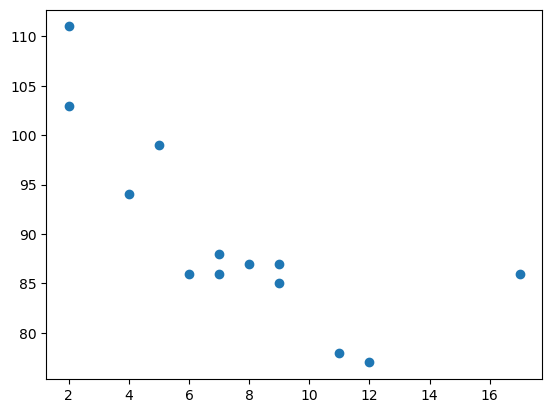

In [7]:
x_example = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y_example = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x_example, y_example)
plt.show()

Additionally, we can incorporate different visual elements such as color, size, and annotations to convey additional information about the objects' properties or the simulation itself. For example, we can use different colors to differentiate between objects or represent the magnitude of certain physical quantities.

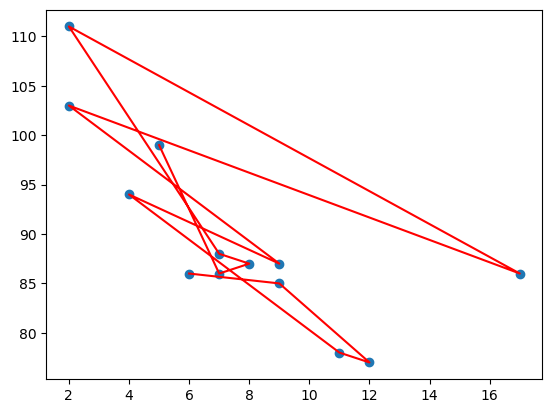

In [8]:
plt.plot(x_example, y_example, c = "r")
plt.scatter(x_example, y_example)
plt.show()

By visualizing the motion and trajectories of objects, we can better understand the effects of forces and interactions within the simulation and gain valuable insights into the behavior of the system.

Let's implement the visualization using the matplotlib library. We'll create a simple function that takes a list of points and plots them on a 2D graph. Here's the code:

In [9]:
def visualize(positions):
    plt.clf()
    x = [point.x for point in positions[-1]]
    y = [point.y for point in positions[-1]]
    plt.scatter(x, y)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.gca().set_aspect('equal')
    plt.pause(0.1)

## 3. Simulating Realistic Object Motion: Implementing Newtonian Mechanics
In this step, we aim to enhance the physics engine by implementing Newtonian mechanics, which governs the motion of objects based on the forces acting upon them. By incorporating Newton's laws of motion, we can create a more realistic simulation of object behavior within the physics engine. Click [here](https://www.khanacademy.org/science/physics/forces-newtons-laws) to learn more.

![Newton's laws](LoM.png)

Newton's laws provide a fundamental framework for understanding the motion of objects. The first law states that an object at rest will remain at rest, and an object in motion will continue moving at a constant velocity, unless acted upon by an external force. The second law relates the acceleration of an object to the net force acting upon it and its mass. The third law states that for every action, there is an equal and opposite reaction.

To simulate the motion of objects, we can represent them as particles with properties such as mass, position, velocity, and acceleration. We can calculate the forces acting on these particles, such as gravitational forces, applied forces, or frictional forces. By applying Newton's second law (F = ma),as we saw above we can compute the resulting acceleration and update the particle's velocity and position over time using numerical integration methods like **Euler's method**.

Let's implement Newtonian mechanics with forces as vectors acting on material points. We'll create a Particle class to represent a material point with properties like position, velocity, and acceleration. We'll simulate the motion of particles by applying forces and updating their positions and velocities using numerical integration (Euler's method). 
Here's the code:


In [6]:
G = 9.8

class Particle:
    def __init__(self, mass, position, velocity, radius):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.radius = radius
        self.forces = []
        self.mass_inv = 1.0 / mass

    def apply_force(self, force):
        scaled_force = force * self.mass_inv
        self.forces.append(scaled_force)
        
    def apply_gravitational_force(self):
        gravity_force = Vector(0, -self.mass * G)
        self.apply_force(gravity_force)

    def update(self, dt):
        acceleration = sum(self.forces, Vector(0, 0)) * (1 / self.mass)
        
        self.velocity += acceleration * dt
        self.position += self.velocity * dt
        self.forces = []

    def reset_forces(self):
        self.forces = []

It is important to note that the accuracy and stability of the simulation depend on the chosen integration method and the time step used for updating the positions and velocities. Exploring more advanced numerical integration techniques like [Verlet integration](https://en.wikipedia.org/wiki/Verlet_integration) or [Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) can lead to improved simulation accuracy and stability.

Implementing Newtonian mechanics allows us to accurately simulate the motion of objects within the physics engine, providing a realistic foundation for various applications such as computer games or simulations.

## 4. Implementing Collision Detection and Momentum Conservation
In this step, we focus on enhancing the physics engine by implementing collision detection and momentum conservation. Collisions occur when objects come into contact with each other, and it is essential to handle them correctly to ensure realistic behavior within the simulation.

![Collision](collision.png)

Collision detection involves identifying when objects intersect or overlap in space. This can be done using various algorithms such as bounding box collision detection, spatial partitioning methods (e.g., octrees or spatial hashing), or more complex algorithms like the Separating Axis Theorem (SAT) for polygonal objects. If you are more interested click [here](https://en.wikipedia.org/wiki/Hyperplane_separation_theorem)

![SAT](SAT.png)

Once a collision is detected, it is crucial to handle it appropriately while conserving momentum. The law of conservation of momentum states that the total momentum of a system remains constant before and after a collision, provided no external forces are involved. To implement this, we can calculate the new velocities of the colliding objects based on their masses and initial velocities using the principles of elastic or inelastic collisions.

![COM](COM.png)

In elastic collisions, both momentum and kinetic energy are conserved. The resulting velocities of the objects can be computed using the formulas derived from the conservation laws. In inelastic collisions, while momentum is conserved, some kinetic energy is lost due to the objects sticking together or undergoing deformation.

Now, let's implement collision detection, taking into account momentum and the law of conservation of momentum. We'll define a simple collision detection function that checks for collisions between particles and updates their velocities accordingly. Here's the code:

In [14]:
def detect_collision(particle1, particle2):
    distance_squared = (particle2.position.x - particle1.position.x) + (particle2.position.y - particle1.position.y)
    combined_radius_squared = particle1.radius + particle2.radius

    if distance_squared <= combined_radius_squared:
        inv_mass_sum = 1.0 / (particle1.mass + particle2.mass)
        
        normal_x = (particle2.position.x - particle1.position.x) / distance_squared
        normal_y = (particle2.position.y - particle1.position.y) / distance_squared
        
        relative_velocity_x = particle2.velocity.x - particle1.velocity.x
        relative_velocity_y = particle2.velocity.y - particle1.velocity.y
        
        impulse = (2.0 * particle2.mass * inv_mass_sum) * (normal_x * relative_velocity_x + normal_y * relative_velocity_y)
        
        particle1.velocity.x += impulse * particle1.mass_inv
        particle2.velocity.x -= impulse * particle2.mass_inv

Implementing collision detection and momentum conservation ensures that objects within the physics engine interact realistically, taking into account the physical laws that govern such interactions.

### The Logic Behind Momentum Conservation
Consider a collision between two objects - object 1 and object 2. For such a collision, the forces acting between the two objects are equal in magnitude and opposite in direction (Newton's third law). This statement can be expressed in equation form as follows.
$$ F_1 = -F_2 $$

The forces act between the two objects for a given amount of time. In some cases, the time is long; in other cases the time is short. Regardless of how long the time is, it can be said that the time that the force acts upon object 1 is equal to the time that the force acts upon object 2. This is merely logical. Forces result from interactions (or contact) between two objects. If object 1 contacts object 2 for 0.050 seconds, then object 2 must be contacting object 1 for the same amount of time (0.050 seconds). As an equation, this can be stated as $ t_1 = t_2 $


Since the forces between the two objects are equal in magnitude and opposite in direction, and since the times for which these forces act are equal in magnitude, it follows that the impulses experienced by the two objects are also equal in magnitude and opposite in direction. As an equation, this can be stated as $ F_1t_1 = -F_2t_2 $ **The impulses are equal in magnitude and opposite in direction.**

But the impulse experienced by an object is equal to the change in momentum of that object (the impulse-momentum change theorem). Thus, since each object experiences equal and opposite impulses, it follows logically that they must also experience equal and opposite momentum changes. As an equation, this can be stated as:
$$ m_1\Delta v_1 = -m_2\Delta v_2 $$
**The moment changes are equal in magnitude and opposite in direction**

### Finalization 

Finally, you can create particles, apply forces, and update their positions and velocities over time to simulate the physics. Here's an example:

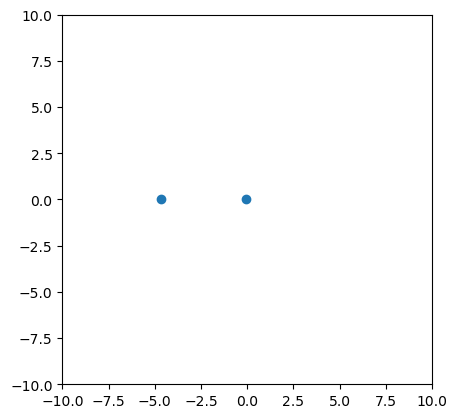

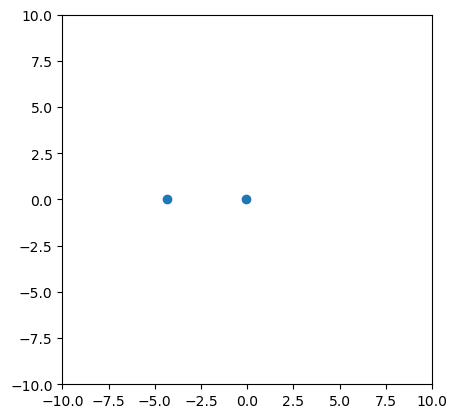

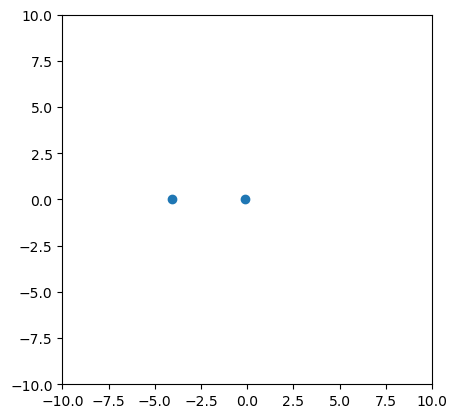

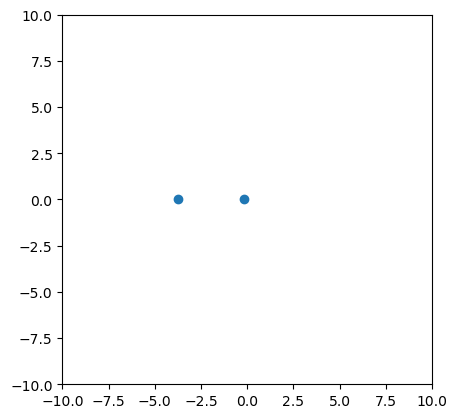

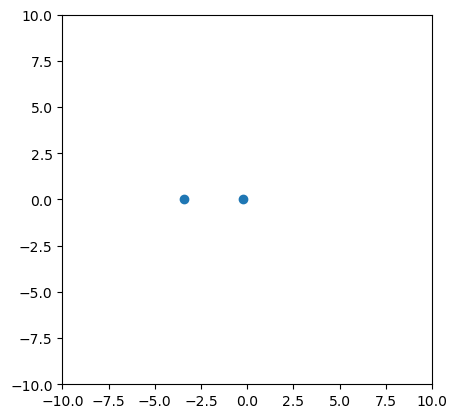

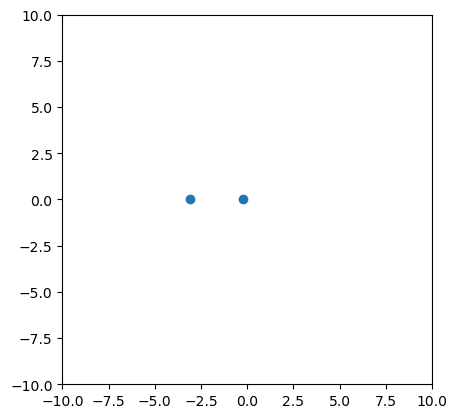

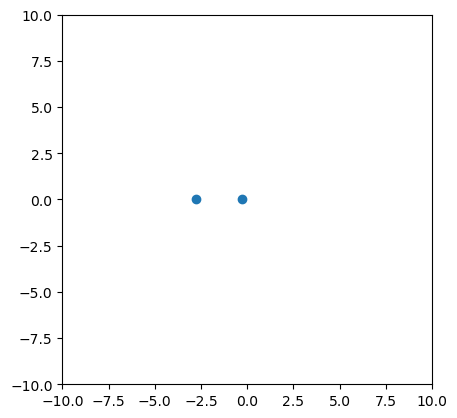

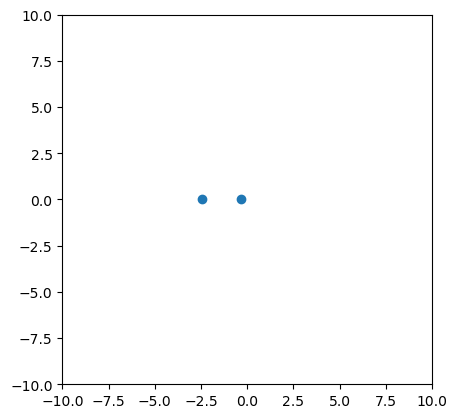

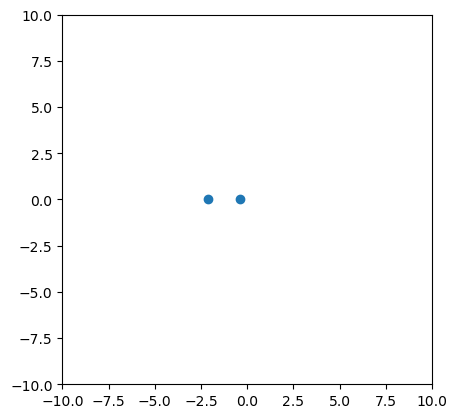

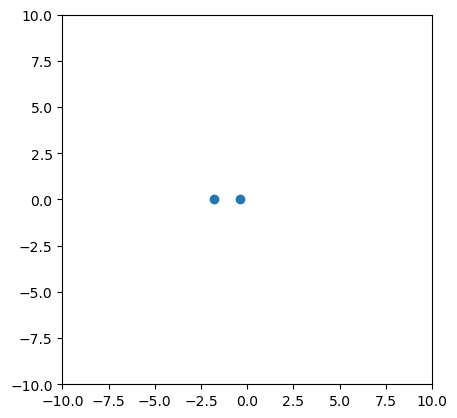

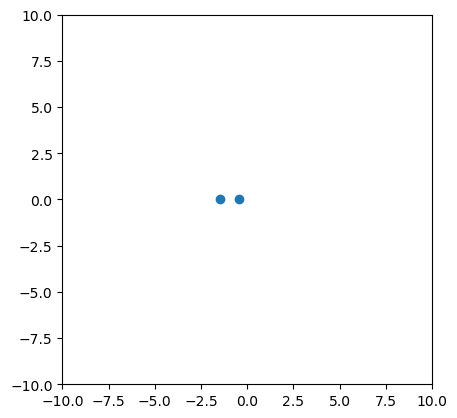

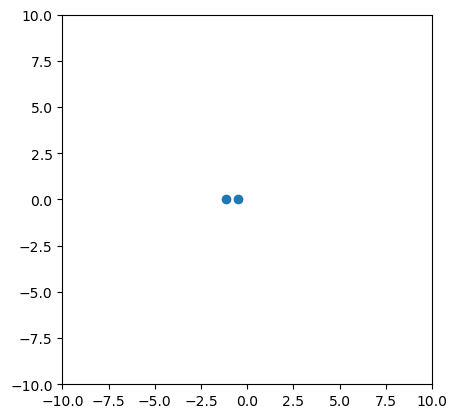

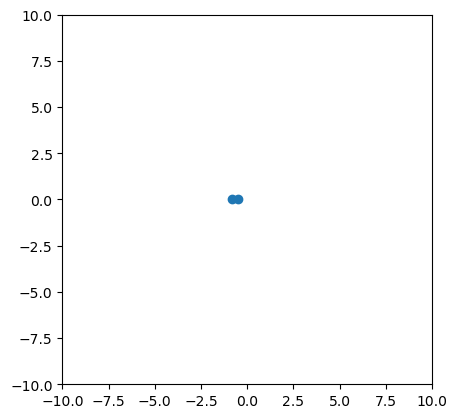

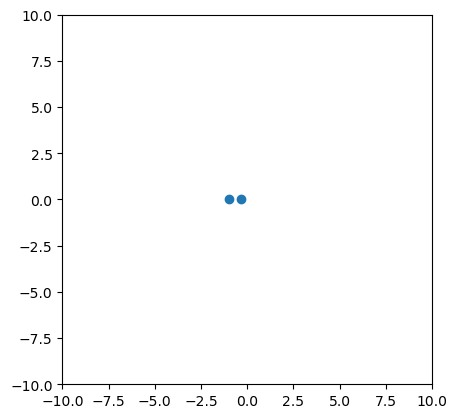

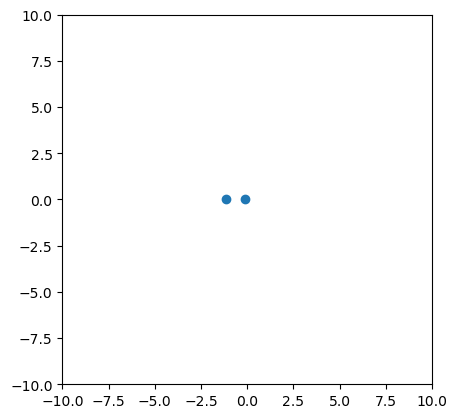

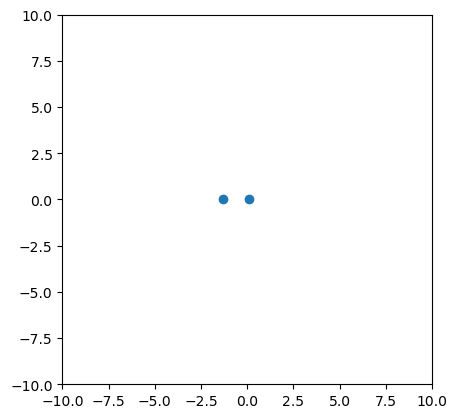

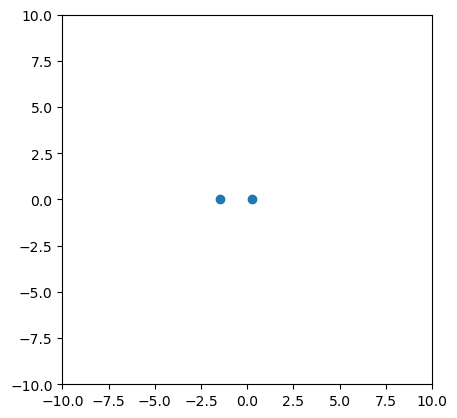

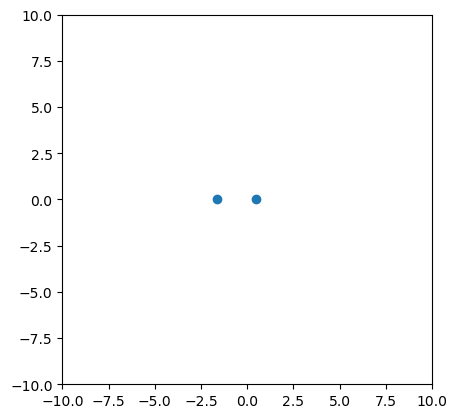

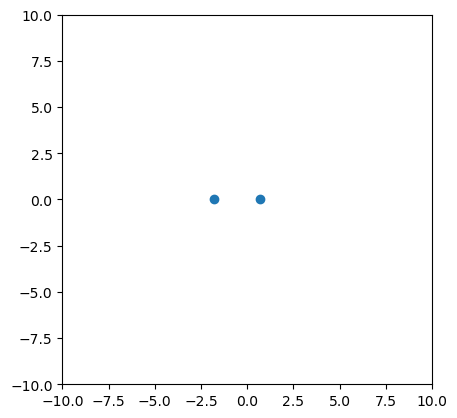

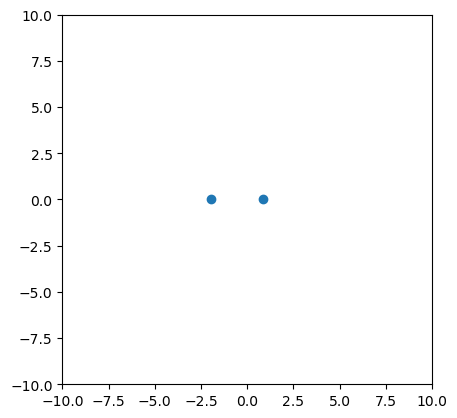

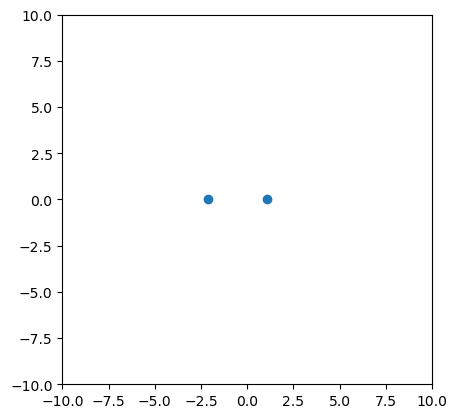

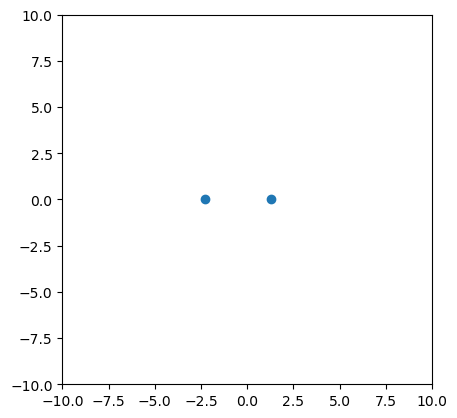

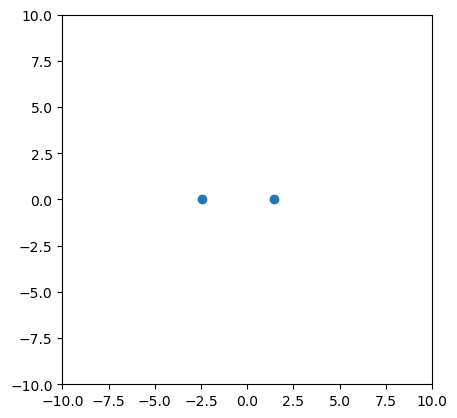

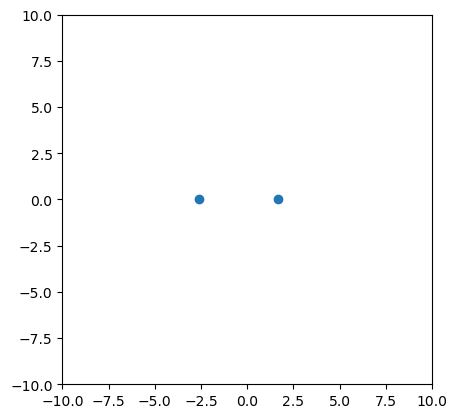

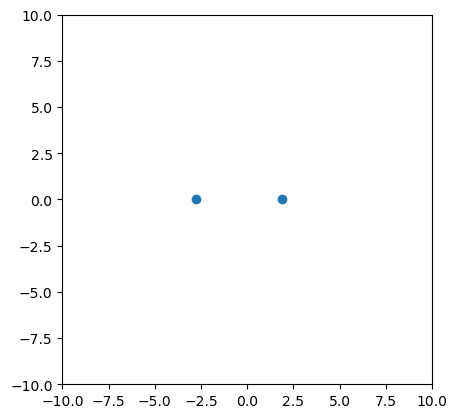

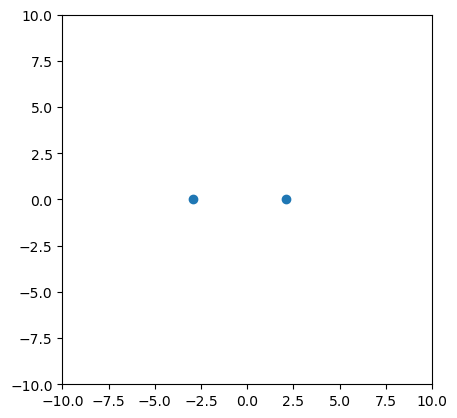

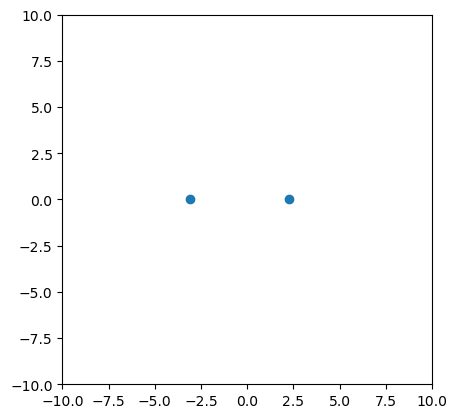

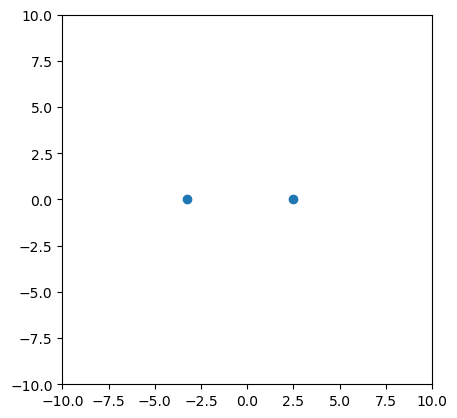

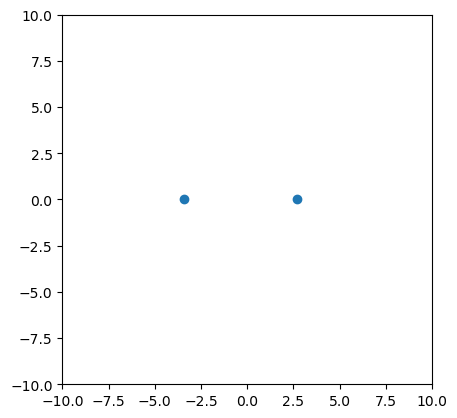

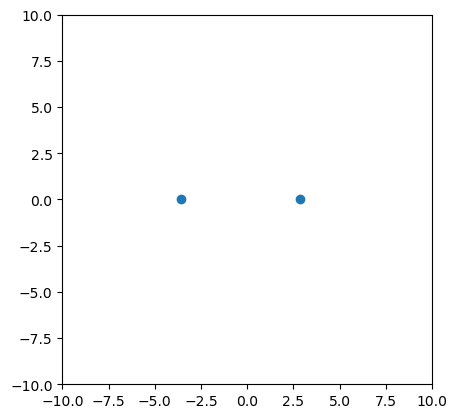

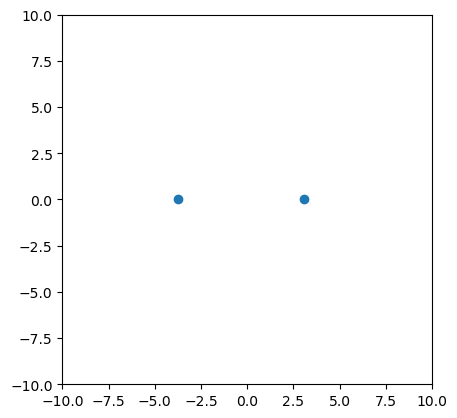

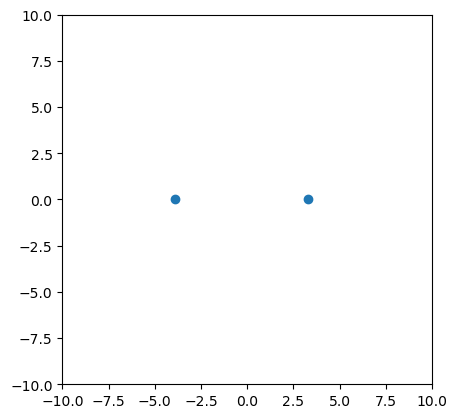

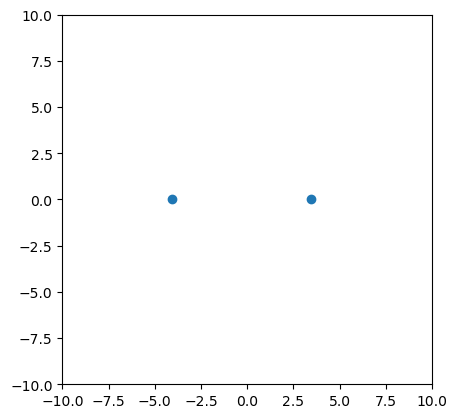

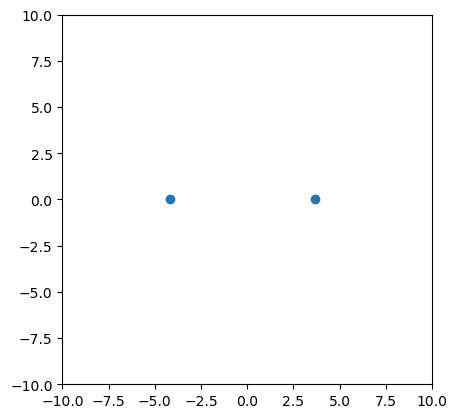

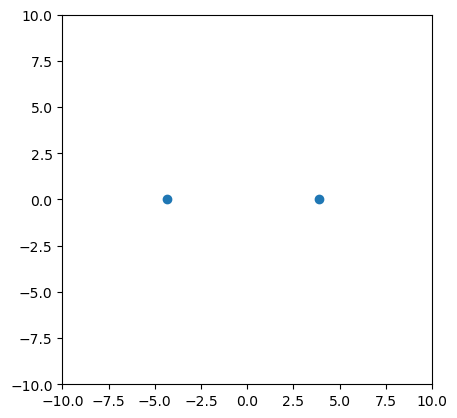

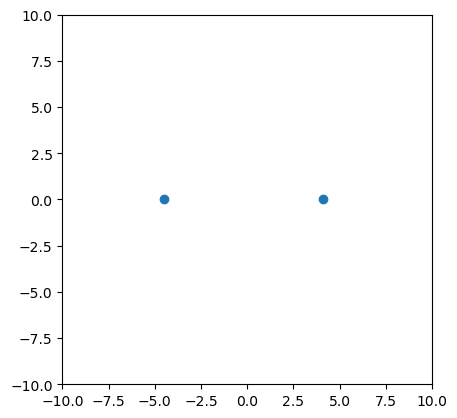

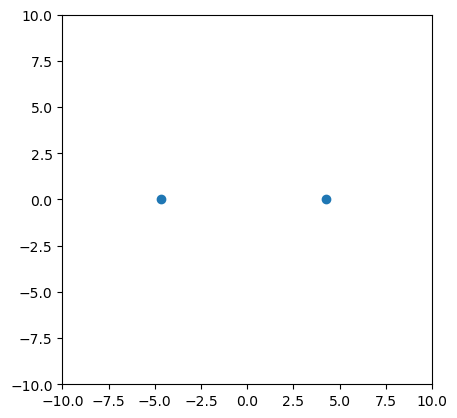

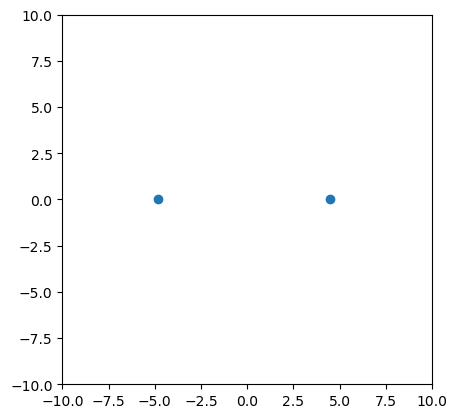

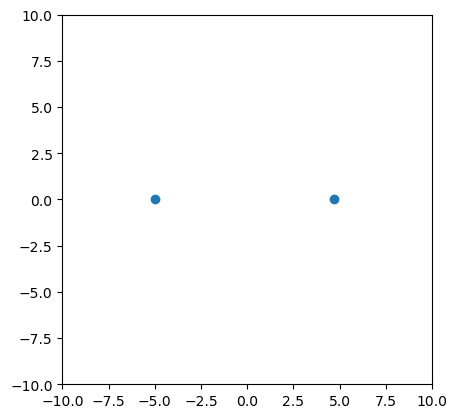

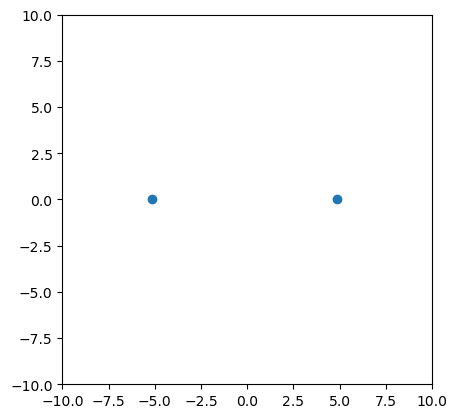

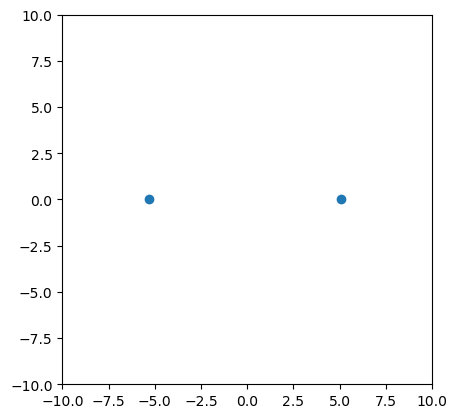

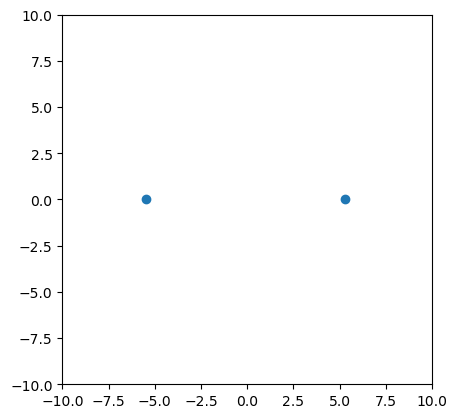

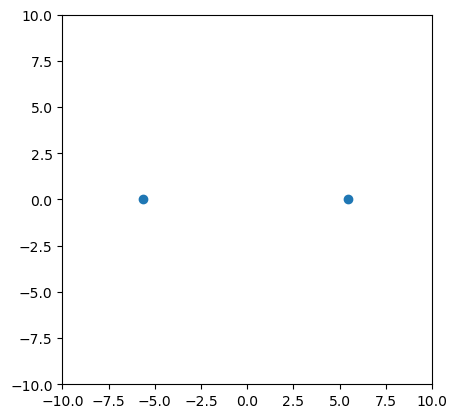

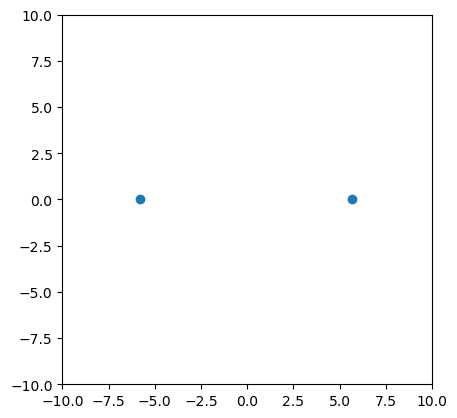

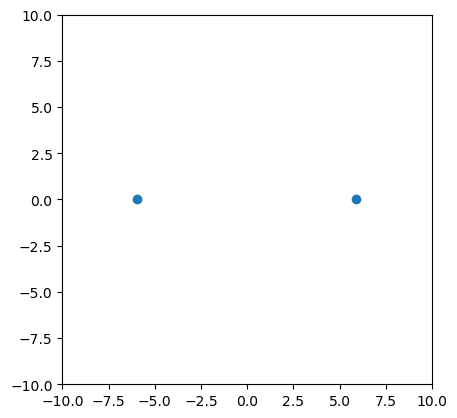

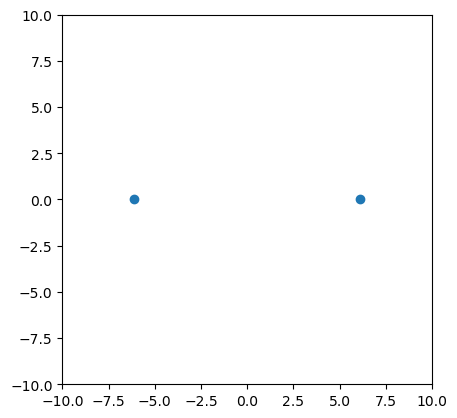

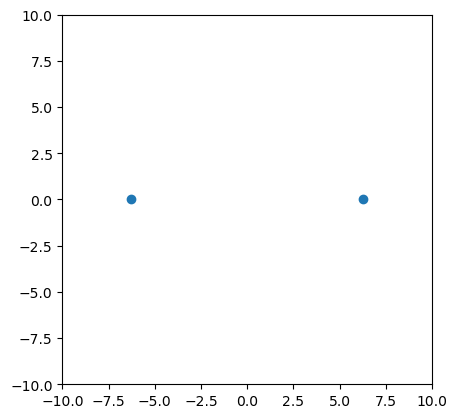

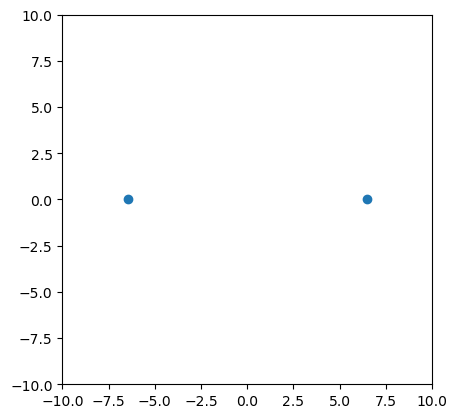

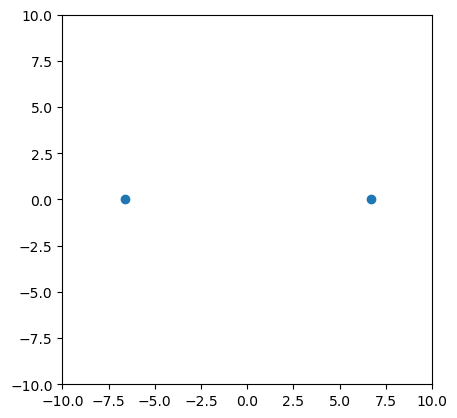

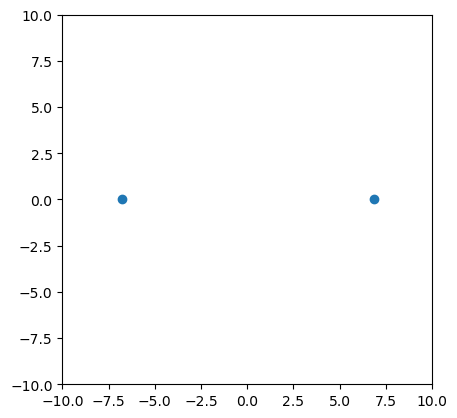

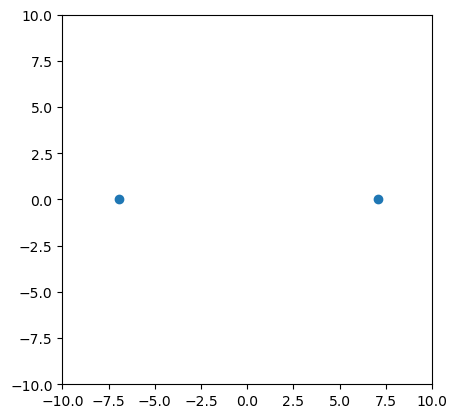

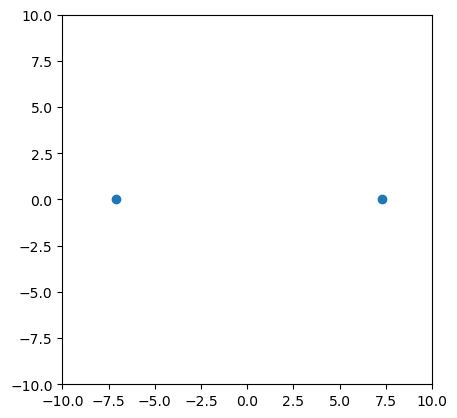

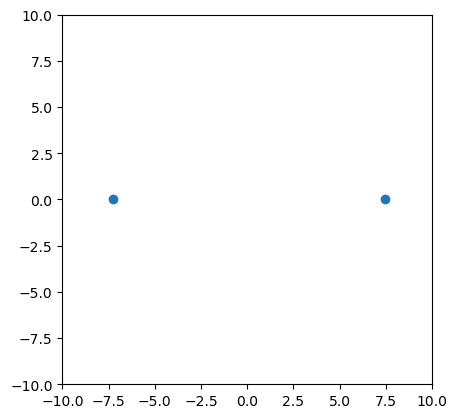

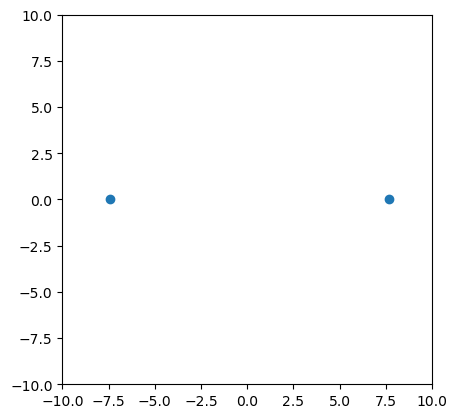

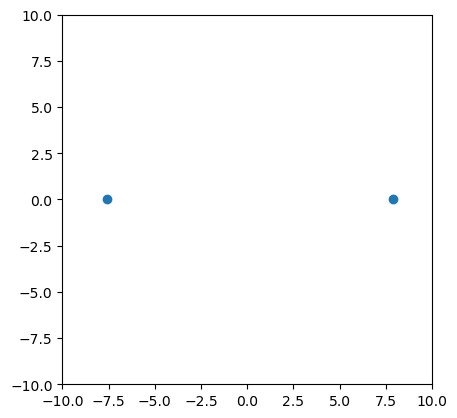

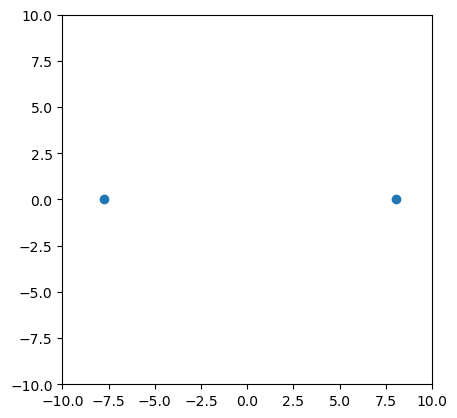

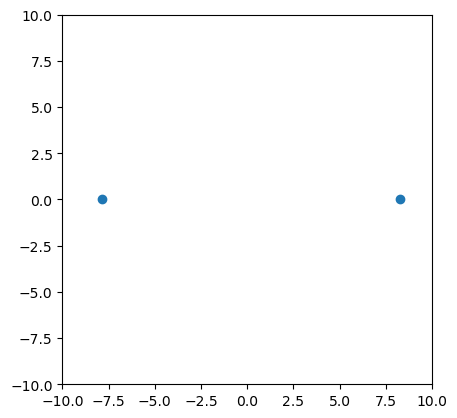

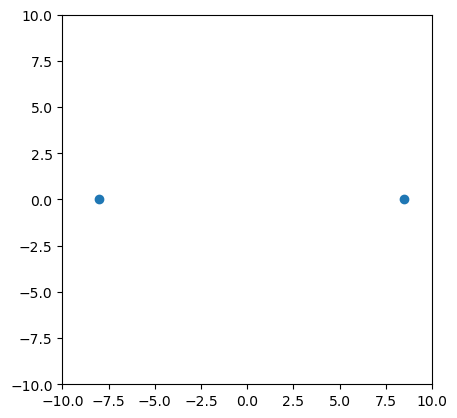

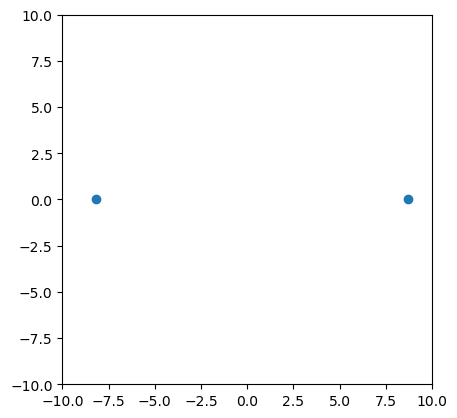

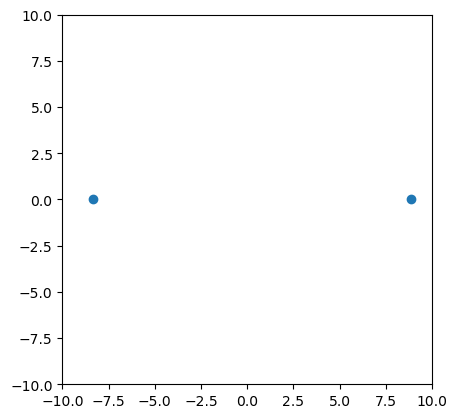

In [17]:
particle1 = Particle(mass=1, position=Vector(-5, 0), velocity=Vector(0, 0), radius=0.3)
particle2 = Particle(mass=2, position=Vector(0, 0), velocity=Vector(0, 0), radius=0.3)

dt = 0.2
positions = [[particle1.position, particle2.position]]  

force_on_particle1 = Vector(8, 0)  
particle1.apply_force(force_on_particle1)

force_on_particle2 = Vector(-4, 0)  
particle2.apply_force(force_on_particle2)

for _ in range(60):
    detect_collision(particle1, particle2)
    particle1.update(dt)
    particle2.update(dt)
    positions.append([particle1.position, particle2.position])  
    
    visualize(positions)

plt.show()

## 5. Exploring Advanced Physical Phenomena: Adding Heat Transfer and Reflection of Light
In this step, we delve into advanced physical phenomena to enhance the realism of the physics engine. We focus on implementing heat transfer and reflection of light, which are crucial aspects in various simulation and gaming scenarios.

Heat transfer is the process of energy exchange between objects due to temperature differences. It plays a vital role in simulations involving fluid dynamics, thermodynamics, and other heat-related phenomena. To incorporate heat transfer into the physics engine, we need to consider factors such as thermal conductivity, specific heat capacity, and temperature gradients between objects. Algorithms like finite difference methods or finite element methods can be utilized to simulate heat diffusion and conduction between objects. Here is a simple example:
```python
def calculate_heat_transfer(self, dt):
    ambient_temperature = 25.0
    temperature_difference = ambient_temperature - self.temperature
    heat_transfer_coefficient = 0.5 
        
    temperature_change = heat_transfer_coefficient * temperature_difference * dt
    return temperature_change
```

Reflection of light is another important phenomenon that adds visual realism to simulations. When light interacts with surfaces, it can be absorbed, transmitted, or reflected. Implementing light reflection involves calculating the incident angle, surface normal, and reflectance properties of objects. Techniques like ray tracing or simplified reflection models, such as the Phong reflection model, can be employed to simulate realistic reflections and lighting effects.
Example:
```python
def calculate_reflected_light(self, incoming_light):
    reflection_coefficient = self.reflectivity  
        
    reflected_light = incoming_light * reflection_coefficient
    return reflected_light
```
Let's implement it in the already existing code (more specifically in our Particle class):

In [13]:
class AdvancedParticle:
    def __init__(self, mass, position, velocity, radius, temperature, reflectivity):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.radius = radius
        self.forces = []
        self.mass_inv = 1.0 / mass
        self.temperature = temperature
        self.reflectivity = reflectivity

    def apply_force(self, force):
        self.forces.append(force)

    def update(self, dt):
        acceleration = sum(self.forces, Vector(0, 0)) * (1 / self.mass)
        self.velocity += acceleration * dt
        self.position += self.velocity * dt
        self.forces = []
        
        self.temperature += self.calculate_heat_transfer(dt)

    def reset_forces(self):
        self.forces = []
        
    def calculate_heat_transfer(self, dt):
        ambient_temperature = 25.0
        temperature_difference = ambient_temperature - self.temperature
        heat_transfer_coefficient = 0.5 
        
        temperature_change = heat_transfer_coefficient * temperature_difference * dt
        return temperature_change
    
    def calculate_reflected_light(self, incoming_light):
        reflection_coefficient = self.reflectivity  
        
        reflected_light = incoming_light * reflection_coefficient
        return reflected_light

In [14]:
particle3 = AdvancedParticle(mass=1, position=Vector(0, 0), velocity=Vector(1, 0), radius=0.39, temperature=60.0, reflectivity=0.5)
particle4 = AdvancedParticle(mass=2, position=Vector(3, 0), velocity=Vector(-0.5, 0), radius=0.39, temperature=100.0, reflectivity=0.5)

In [15]:
print(particle3.calculate_heat_transfer(1))
print(particle4.calculate_heat_transfer(1))

-17.5
-37.5


Let's suppose our **particle3** is a mirror with 1/2 reflectivity coefficient:

In [16]:
def plot_mirror():
    incoming_light = Vector(0.6, 1)  
    reflected_light = particle3.calculate_reflected_light(incoming_light)

    plt.quiver(incoming_light.x, incoming_light.y, 0 - incoming_light.x, 0 - incoming_light.y, angles = "xy", scale_units = "xy", scale = 1, color = "r")
    plt.quiver(0, 0, -reflected_light.x, reflected_light.y, angles = "xy", scale_units = "xy", scale = 1, color = "b")
    plot_boundary = 2
    
    plt.xlim(-plot_boundary, plot_boundary)
    plt.ylim(-plot_boundary, plot_boundary)
    
    plt.xticks(range(-plot_boundary, plot_boundary + 1))
    plt.yticks(range(-plot_boundary, plot_boundary + 1))
        
    x = particle3.position.x
    y = particle3.position.y
    
    plt.scatter(x, y)
    plt.gca().set_aspect('equal')
    
    plt.show()

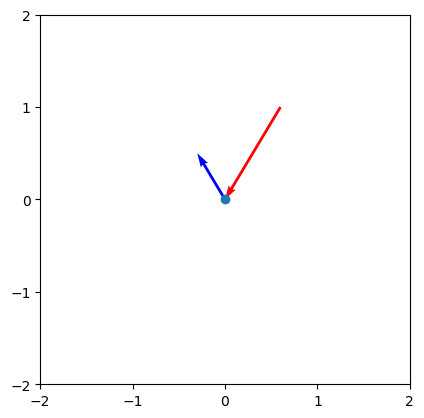

In [17]:
plot_mirror()

By incorporating heat transfer and reflection of light, the physics engine can simulate more realistic scenarios, allowing for more immersive simulations and visually appealing game environments.

## 6. Enhancements and Optimization: Refining the Physics Engine for Efficiency
Enhancing and optimizing the physics engine means to ensure efficient and smooth performance. By refining the engine, we can improve its computational speed, memory usage, and overall efficiency.

One important aspect to consider is algorithmic optimization. Analyze the existing code and algorithms used in the physics engine to identify potential areas for improvement. Look for opportunities to reduce unnecessary calculations, optimize data structures, or implement more efficient algorithms. 

Furthermore, profiling and benchmarking are essential steps in optimization. Profile the code to identify bottlenecks and areas of high computational load. Use benchmarking techniques to measure the performance of the physics engine under different scenarios and identify areas that require further optimization.

Lastly, keep abreast of recent research and developments in physics engine optimization. Explore academic papers, technical blogs, and forums dedicated to game development and physics simulation. These resources can provide insights into advanced optimization techniques, data-oriented design, and other strategies to enhance the efficiency of the physics engine.

![SE](SE.png)

By focusing on enhancements and optimization, you can ensure that the physics engine performs efficiently, allowing for more complex simulations, larger-scale environments, and smoother gameplay experiences.

## 7. Conclusion: Summarizing the Achievements and Learnings of the Project
Throughout the project, we successfully implemented a physics engine using vectors, algebra, and calculus. The engine was capable of simulating Newtonian mechanics, incorporating forces as vectors acting on material points. We also extended the functionality to include collision detection, considering momentum conservation to ensure realistic interactions between objects. Additionally, we explored advanced physical phenomena such as heat transfer and reflection of light.

The implementation of visualization techniques allowed us to visualize motion, trajectories, and other physical properties of objects within the simulation. This added a visual aspect to the project, enhancing the understanding and immersion of the simulated scenarios.

During the project, we deepened our understanding of vectors, algebra, and calculus concepts relevant to physics engines. We also gained insights into the implementation of various physical processes, collision detection, and optimization strategies. The project provided hands-on experience in developing a physics engine and applying fundamental principles of physics and mathematics in a practical context.

In conclusion, the project successfully implemented a physics engine with key features such as motion simulation and collision detection. The project not only demonstrated the application of mathematical concepts and algorithms but also highlighted the importance of optimization for efficient simulation and gameplay experiences.

![KSP](KSP.jpeg)

## References:
- https://dev.to/fkkarakurt/matrices-and-vectors-in-game-development-67h
- http://buildnewgames.com/gamephysics/
- https://www.w3schools.com/python/matplotlib_scatter.asp
- https://physics.weber.edu/schroeder/scicomp/PythonManual.pdf
- https://www.routledge.com/Game-Physics-Engine-Development/The-Real-Time-Rendering-Workshop-Series/p/book/9780123819765
- https://www.physicsclassroom.com/class/momentum/Lesson-2/Momentum-Conservation-Principle
- https://www.realtimerendering.com/

### Books:
- https://www.amazon.com/Physics-Game-Developers-David-Bourg/dp/0596000065
- https://www.amazon.com/Game-Physics-Engine-Development-Commercial-Grade/dp/0123819768
- https://www.amazon.com/Real-Time-Collision-Detection-Interactive-Technology/dp/1558607323
- https://www.amazon.com/Engine-Architecture-Third-Jason-Gregory/dp/1138035459/ref=sr_1_1?crid=FBCH2Z7GSYE2&keywords=Game+Engine+Architecture&qid=1686243184&s=books&sprefix=game+engine+architecture%2Cstripbooks-intl-ship%2C169&sr=1-1